In [146]:
# Install packages 
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

# Import libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced visualization
from sklearn.preprocessing import StandardScaler  # For data scaling
import statsmodels.api as sm  # For statistical modeling
import re

In [2]:
import os

# set working directory 
os.chdir('/Users/michelletirtoatmojo/Downloads')

In [3]:
# Load necessary datasets 
passing = pd.read_csv('player_passing.csv')
poss = pd.read_csv('player_possession.csv')
shoot = pd.read_csv('player_shooting.csv')
defense = pd.read_csv('player_defense.csv')

In [4]:
# Inspect data 
print(passing.head())
print(poss.head())
print(shoot.head())
print(defense.head())

                 player position       team     age  birth_year  minutes_90s  \
0            Aaron Mooy       MF  Australia  32-094        1990          4.0   
1          Aaron Ramsey       MF      Wales  31-357        1990          3.0   
2     Abdelhamid Sabiri       MF    Morocco  26-020        1996          2.0   
3     Abdelkarim Hassan       DF      Qatar  29-112        1993          3.0   
4  Abderrazak Hamdallah       FW    Morocco  32-001        1990          0.8   

   passes_completed  passes  passes_pct  passes_total_distance  ...  \
0             170.0   217.0        78.3                 2819.0  ...   
1              88.0   112.0        78.6                 1796.0  ...   
2              45.0    58.0        77.6                  690.0  ...   
3             122.0   161.0        75.8                 2462.0  ...   
4               8.0    15.0        53.3                   64.0  ...   

   passes_pct_long  assists  xg_assist  pass_xa  xg_assist_net  \
0             58.1        

In [5]:
# Understand variables 
def understand_variables(df):
    variables = pd.DataFrame(columns=['Variable', 'Number of unique values', 'Values'])
    for i, var in enumerate(df.columns):
        variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    return variables

print("Passing Variables:")
print(understand_variables(passing))

print("\nPossession Variables:")
print(understand_variables(possession))

print("\nShooting Variables:")
print(understand_variables(shooting))

Passing Variables:
                       Variable  Number of unique values  \
0                        player                      680   
1                      position                        4   
2                          team                       32   
3                           age                      634   
4                    birth_year                       22   
5                   minutes_90s                       65   
6              passes_completed                      224   
7                        passes                      251   
8                    passes_pct                      292   
9         passes_total_distance                      598   
10  passes_progressive_distance                      466   
11       passes_completed_short                      137   
12                 passes_short                      147   
13             passes_pct_short                      193   
14      passes_completed_medium                      134   
15                pas

NameError: name 'possession' is not defined

In [ ]:
# Exploratory Data Analysis 

In [8]:
# Filter the dataset to include only the relevant columns
attacker_kpis = shoot[['player', 'position', 'team','birth_year', 'age', 'goals', 'shots', 'shots_on_target', 
                         'goals_per_shot_on_target', 'goals_per_shot', 'xg', 'npxg']]

attacker_kpis

,player,position,team,birth_year,age,goals,shots,shots_on_target,goals_per_shot_on_target,goals_per_shot,xg,npxg
0,Aaron Mooy,MF,Australia,1990,32-094,0,1,0,NaN,0.00,0.0,0.0
1,Aaron Ramsey,MF,Wales,1990,31-357,0,1,0,NaN,0.00,0.0,0.0
2,Abdelhamid Sabiri,MF,Morocco,1996,26-020,0,3,0,NaN,0.00,0.1,0.1
3,Abdelkarim Hassan,DF,Qatar,1993,29-112,0,6,0,NaN,0.00,0.3,0.3
4,Abderrazak Hamdallah,FW,Morocco,1990,32-001,0,2,1,0.00,0.00,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,1988,34-307,1,6,3,0.33,0.17,0.8,0.8
676,Ángelo Preciado,DF,Ecuador,1998,24-303,0,4,0,NaN,0.00,0.1,0.1
677,Éder Militão,DF,Brazil,1998,24-334,0,5,1,0.00,0.00,0.2,0.2
678,Óscar Duarte,DF,Costa Rica,1989,33-198,0,0,0,NaN,NaN,0.0,0.0


In [9]:
defense_kpis = defense[['player', 'position', 'team', 'age', 'birth_year','tackles', 'tackles_won', 'dribble_tackles', 'dribbled_past', 
                   'blocks', 'interceptions', 'clearances', 'errors']]

defense_kpis

,player,position,team,age,birth_year,tackles,tackles_won,dribble_tackles,dribbled_past,blocks,interceptions,clearances,errors
0,Aaron Mooy,MF,Australia,32-094,1990,9.0,6,6.0,2.0,6.0,3,9.0,0.0
1,Aaron Ramsey,MF,Wales,31-357,1990,2.0,0,0.0,2.0,4.0,0,2.0,1.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,3.0,1,2.0,4.0,3.0,5,3.0,0.0
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,7.0,3,3.0,1.0,3.0,1,5.0,0.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.0,0,0.0,1.0,0.0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,34-307,1988,3.0,1,1.0,2.0,3.0,1,0.0,0.0
676,Ángelo Preciado,DF,Ecuador,24-303,1998,7.0,5,2.0,2.0,2.0,6,4.0,0.0
677,Éder Militão,DF,Brazil,24-334,1998,7.0,6,3.0,1.0,1.0,3,5.0,0.0
678,Óscar Duarte,DF,Costa Rica,33-198,1989,4.0,2,2.0,0.0,3.0,6,15.0,0.0


In [41]:
midfielder_kpis = passing[['player', 'position', 'team', 'age', 'birth_year', 'passes_completed', 'assists', 'pass_xa'
                           , 'assisted_shots', 'progressive_passes', 'xg_assist']]

In [42]:
# Select relevant columns from the possession data
poss_columns = ['player', 'team', 'touches', 'touches_mid_3rd', 'miscontrols', 'dispossessed', 'dribbles_completed', 'passes_received',
       'progressive_passes_received']
# Select the relevant columns from the possession data
poss_selected = poss[poss_columns]

In [43]:
# Merge poss variable to midfielder_kpis
midfielder_kpis = midfielder_kpis.merge(poss_selected, on=['player', 'team'], how='left')

In [44]:
# Check for missing values 

attacker_kpis.isnull().sum()
print("Missing Values in attacker_kpis Data:")
print(attacker_kpis.isnull().sum())

defense_kpis.isnull().sum()
print("Missing Values in defense_kpis Data:")
print(defense_kpis.isnull().sum())

midfielder_kpis.isnull().sum()
print("Missing Values in midfielder_kpis  Data:")
print(midfielder_kpis.isnull().sum())

# we see that for defense_kpis and midfielder_kpis, we don't have that much missing value; there is also a pattern that there are 3 missing values 
# i opted to replace the missing values for defense_kpis and midfielder_kpis (NaN) with 0 as it doesn't make sense to replace them with median/mean
# in attacker_kpis, we see that there are a lot of missing values particularly for 2 columns goals_per_shot_on_target and goals_per_shot 
# we will be imputing the data by calculating the ratio goals_per_shot_on_target (goals / shot_on_target) and goals_per_shot (goals / shot) if value is missing

Missing Values in attacker_kpis Data:
player                        0
position                      0
team                          0
birth_year                    0
age                           0
goals                         0
shots                         0
shots_on_target               0
goals_per_shot_on_target    433
goals_per_shot              249
xg                            3
npxg                          3
dtype: int64
Missing Values in defense_kpis Data:
player             0
position           0
team               0
age                0
birth_year         0
tackles            3
tackles_won        0
dribble_tackles    3
dribbled_past      3
blocks             3
interceptions      0
clearances         3
errors             3
dtype: int64
Missing Values in midfielder_kpis  Data:
player                         0
position                       0
team                           0
age                            0
birth_year                     0
passes_completed               3
ass

In [45]:
# Check rows with missing values

missing_attacker = attacker_kpis[defense_kpis.isnull().any(axis=1)]
print("Missing Values in Attacker Data:")
print(missing_attacker)

missing_defense = defense_kpis[defense_kpis.isnull().any(axis=1)]
print("Rows with Missing Values in Defense KPIs:")
print(missing_defense)

missing_midfielder = midfielder_kpis[midfielder_kpis.isnull().any(axis=1)]
print("Rows with Missing Values in Midfielder KPIs:")
print(missing_midfielder)

Missing Values in Attacker Data:
              player position     team  birth_year     age  goals  shots  \
268   Ismail Mohamad       FW    Qatar        1990  32-257      0      2   
354  Kevin Rodríguez       FW  Ecuador        2000  22-289      0      2   
654    Yahya Jabrane       MF  Morocco        1991  31-183      0      0   

     shots_on_target  goals_per_shot_on_target  goals_per_shot  xg  npxg  
268                2                       0.0             0.0 NaN   NaN  
354                1                       0.0             0.0 NaN   NaN  
654                0                       NaN             NaN NaN   NaN  
Rows with Missing Values in Defense KPIs:
              player position     team     age  birth_year  tackles  \
268   Ismail Mohamad       FW    Qatar  32-257        1990      NaN   
354  Kevin Rodríguez       FW  Ecuador  22-289        2000      NaN   
654    Yahya Jabrane       MF  Morocco  31-183        1991      NaN   

     tackles_won  dribble_tackles  

In [46]:
# Make copy on attacker_kpis for imputation 
attacker_kpis_copy = attacker_kpis.copy()
defense_kpis_copy = defense_kpis.copy()
midfielder_kpis_copy = midfielder_kpis.copy()

In [47]:
# Impute missing values for goals_per_shot_on_target
attacker_kpis_copy.loc['goals_per_shot_on_target'] = attacker_kpis.apply(
    lambda row: (row['goals'] / row['shots_on_target']) if pd.isnull(row['goals_per_shot_on_target']) and row['shots_on_target'] != 0 else (0 if row['shots_on_target'] == 0 else row['goals_per_shot_on_target']),
    axis=1
)

# Impute missing values for goals_per_shot
attacker_kpis_copy.loc['goals_per_shot'] = attacker_kpis.apply(
    lambda row: (row['goals'] / row['shots']) if pd.isnull(row['goals_per_shot']) and row['shots'] != 0 else (0 if row['shots'] == 0 else row['goals_per_shot']),
    axis=1
)

In [48]:
# Replace missing values with 0 in attacker_kpis
attacker_kpis_copy.fillna(0, inplace=True)

# Replace missing values with 0 in defense_kpis
defense_kpis_copy.fillna(0, inplace=True)

# Replace missing values with 0 in midfielder_kpis
midfielder_kpis_copy.fillna(0, inplace=True)

In [49]:
# Filter positions 

attacker_positions = ['FW']
defense_positions = ['DF'] 
midfielder_positions = ['MF'] 

In [50]:
filtered_attackers = attacker_kpis_copy[attacker_kpis_copy['position'].isin(attacker_positions)]

filtered_attackers

filtered_attackers.isnull().sum()
print("Missing Values in attacker_kpis Data:")
print(filtered_attackers.isnull().sum())

Missing Values in attacker_kpis Data:
player                      0
position                    0
team                        0
birth_year                  0
age                         0
goals                       0
shots                       0
shots_on_target             0
goals_per_shot_on_target    0
goals_per_shot              0
xg                          0
npxg                        0
dtype: int64


In [51]:
filtered_defense = defense_kpis_copy[defense_kpis_copy['position'].isin(defense_positions)]

filtered_defense

,player,position,team,age,birth_year,tackles,tackles_won,dribble_tackles,dribbled_past,blocks,interceptions,clearances,errors
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,7.0,3,3.0,1.0,3.0,1,5.0,0.0
6,Abdou Diallo,DF,Senegal,26-228,1996,2.0,2,2.0,0.0,1.0,1,10.0,0.0
9,Abdulelah Al-Amri,DF,Saudi Arabia,25-337,1997,1.0,0,0.0,1.0,2.0,4,10.0,0.0
11,Abdullah Madu,DF,Saudi Arabia,29-156,1993,1.0,0,0.0,0.0,3.0,0,2.0,0.0
13,Abolfazl Jalali,DF,IR Iran,24-175,1998,0.0,0,0.0,0.0,0.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Youssouf Sabaly,DF,Senegal,29-288,1993,6.0,6,3.0,2.0,1.0,4,9.0,0.0
667,Youstin Salas,DF,Costa Rica,26-184,1996,5.0,1,3.0,4.0,3.0,0,1.0,0.0
676,Ángelo Preciado,DF,Ecuador,24-303,1998,7.0,5,2.0,2.0,2.0,6,4.0,0.0
677,Éder Militão,DF,Brazil,24-334,1998,7.0,6,3.0,1.0,1.0,3,5.0,0.0


In [52]:
filtered_midfielder = midfielder_kpis_copy[midfielder_kpis_copy['position'].isin(midfielder_positions)]

filtered_midfielder

,player,position,team,age,birth_year,passes_completed,assists,pass_xa,assisted_shots,progressive_passes,xg_assist,touches,touches_mid_3rd,miscontrols,dispossessed,dribbles_completed,passes_received,progressive_passes_received
0,Aaron Mooy,MF,Australia,32-094,1990,170.0,0,0.1,1.0,14.0,0.1,255.0,168.0,5.0,4.0,2.0,152.0,1.0
1,Aaron Ramsey,MF,Wales,31-357,1990,88.0,0,0.1,1.0,5.0,0.0,147.0,73.0,9.0,4.0,2.0,98.0,7.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,45.0,1,0.1,3.0,0.0,0.9,86.0,50.0,0.0,3.0,0.0,54.0,0.0
8,Abdulaziz Hatem,MF,Qatar,32-051,1990,72.0,0,0.0,1.0,1.0,0.0,98.0,65.0,1.0,1.0,1.0,80.0,2.0
10,Abdulellah Al-Malki,MF,Saudi Arabia,28-068,1994,66.0,0,0.0,0.0,3.0,0.0,105.0,63.0,3.0,0.0,0.0,58.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,Yuto Nagatomo,MF,Japan,36-097,1986,78.0,0,0.1,1.0,2.0,0.1,123.0,59.0,1.0,1.0,3.0,67.0,2.0
673,Álvaro Zamora,MF,Costa Rica,20-284,2002,5.0,0,0.0,0.0,1.0,0.0,9.0,7.0,1.0,1.0,0.0,7.0,1.0
674,Ángel Correa,MF,Argentina,27-284,1995,3.0,0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,3.0,0.0
675,Ángel Di María,MF,Argentina,34-307,1988,130.0,1,0.7,10.0,17.0,0.6,201.0,59.0,10.0,6.0,13.0,163.0,24.0


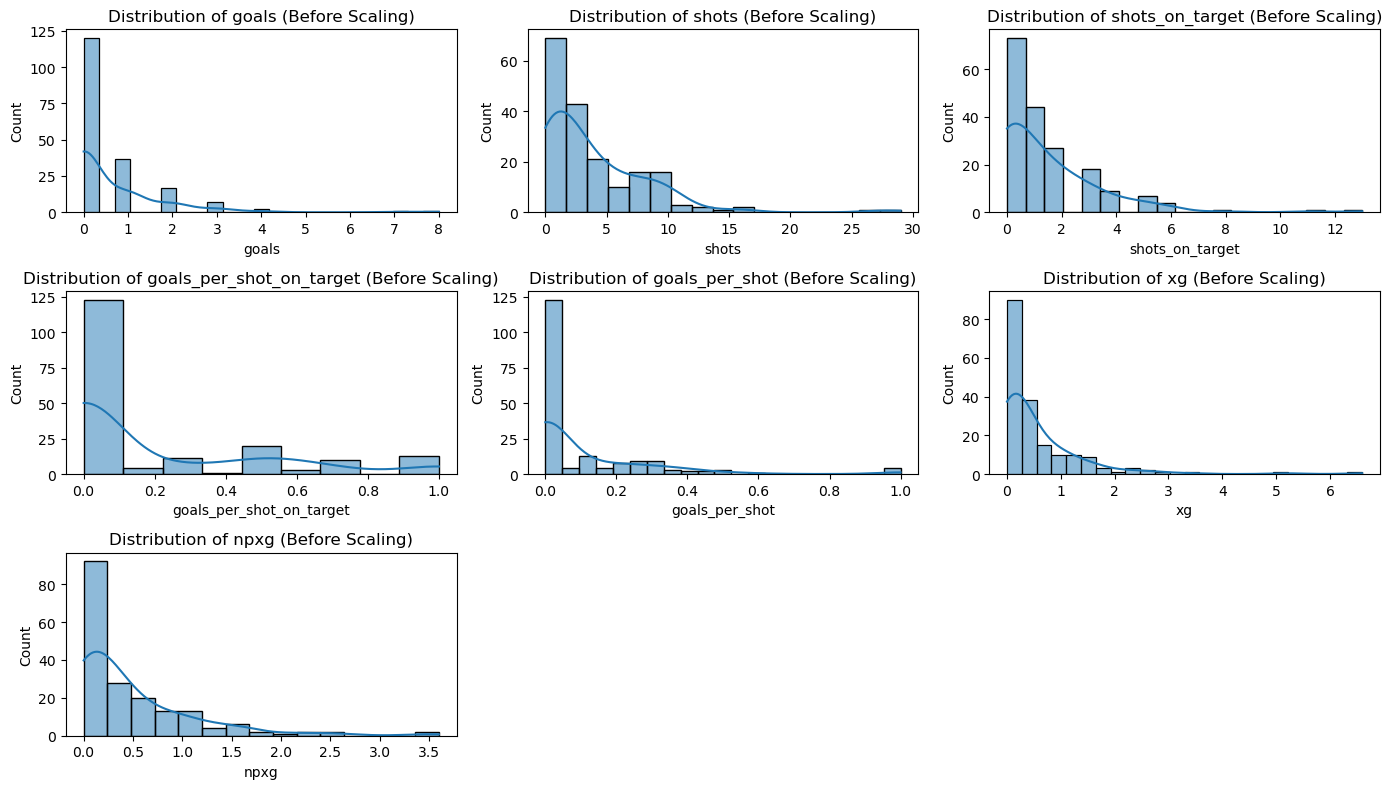

In [53]:
# Visualize distribution for each metric before scaling to understand data distribution and detecting anomalies

# Note: 
# Most of the distributions are right-skewed, indicating majority of the players have lower values with the listed KPIs, with a long tail of players who perform much better 
# The distribution looks normal-like; since we are interested in understanding performance of top players, it makes sense that only few players are considered outliers 

# Attacker KPIs distribution 
plt.figure(figsize=(14, 8))
metrics = ['goals', 'shots', 'shots_on_target', 'goals_per_shot_on_target', 'goals_per_shot', 'xg', 'npxg']
for i, metric in enumerate(metrics):
    plt.subplot(3, 3, i+1)
    sns.histplot(filtered_attackers[metric], kde=True)
    plt.title(f'Distribution of {metric} (Before Scaling)')
plt.tight_layout()
plt.show()

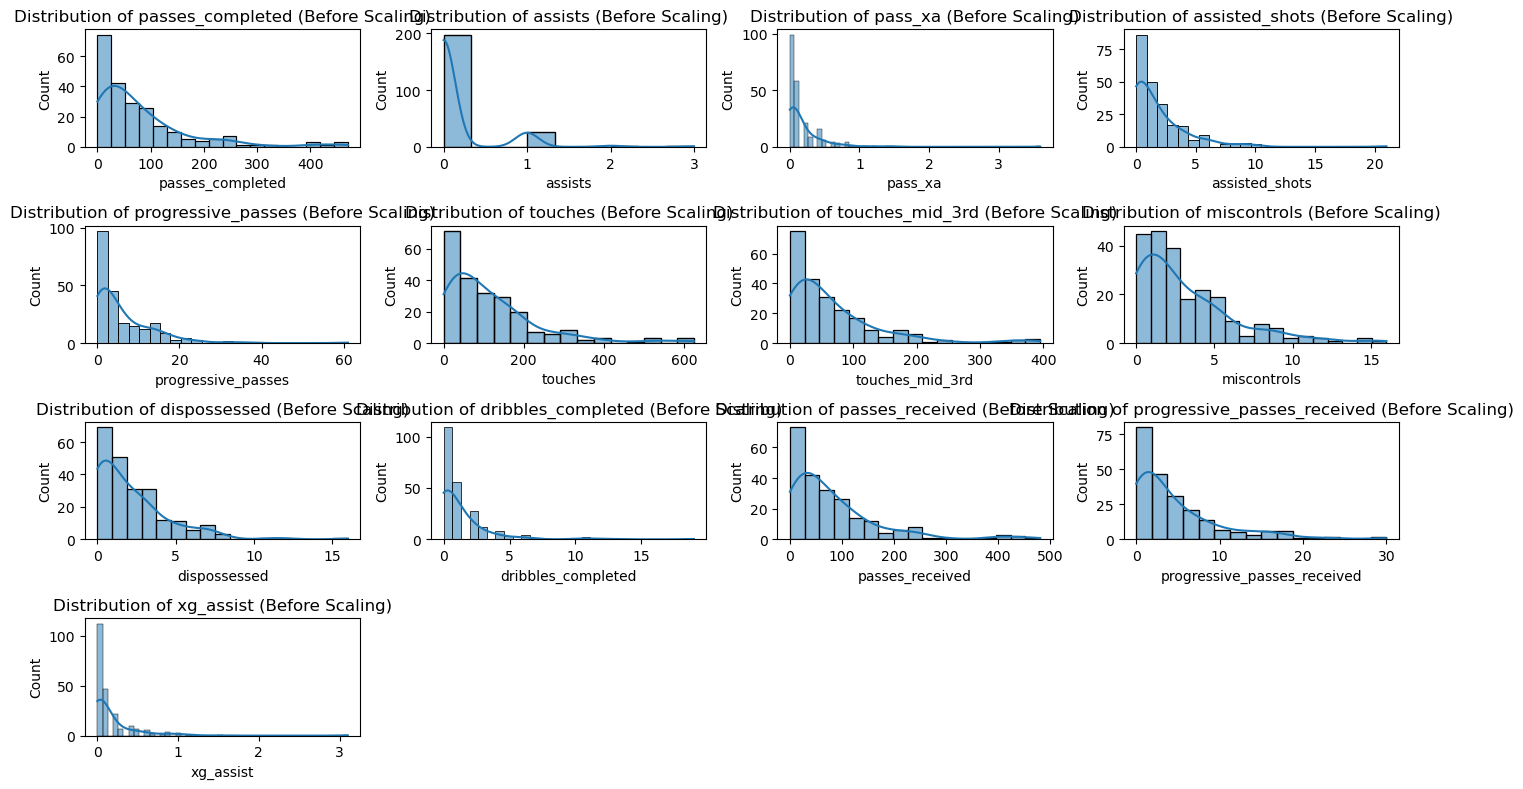

In [55]:
# Midfielder KPIs distribution 
plt.figure(figsize=(14, 8))
metrics = ['passes_completed', 'assists', 'pass_xa'
                           , 'assisted_shots', 'progressive_passes', 'touches', 'touches_mid_3rd', 'miscontrols', 'dispossessed', 'dribbles_completed', 'passes_received',
                           'progressive_passes_received', 'xg_assist']
for i, metric in enumerate(metrics):
    plt.subplot(4, 4, i+1)
    sns.histplot(filtered_midfielder[metric], kde=True)
    plt.title(f'Distribution of {metric} (Before Scaling)')
plt.tight_layout()
plt.show()

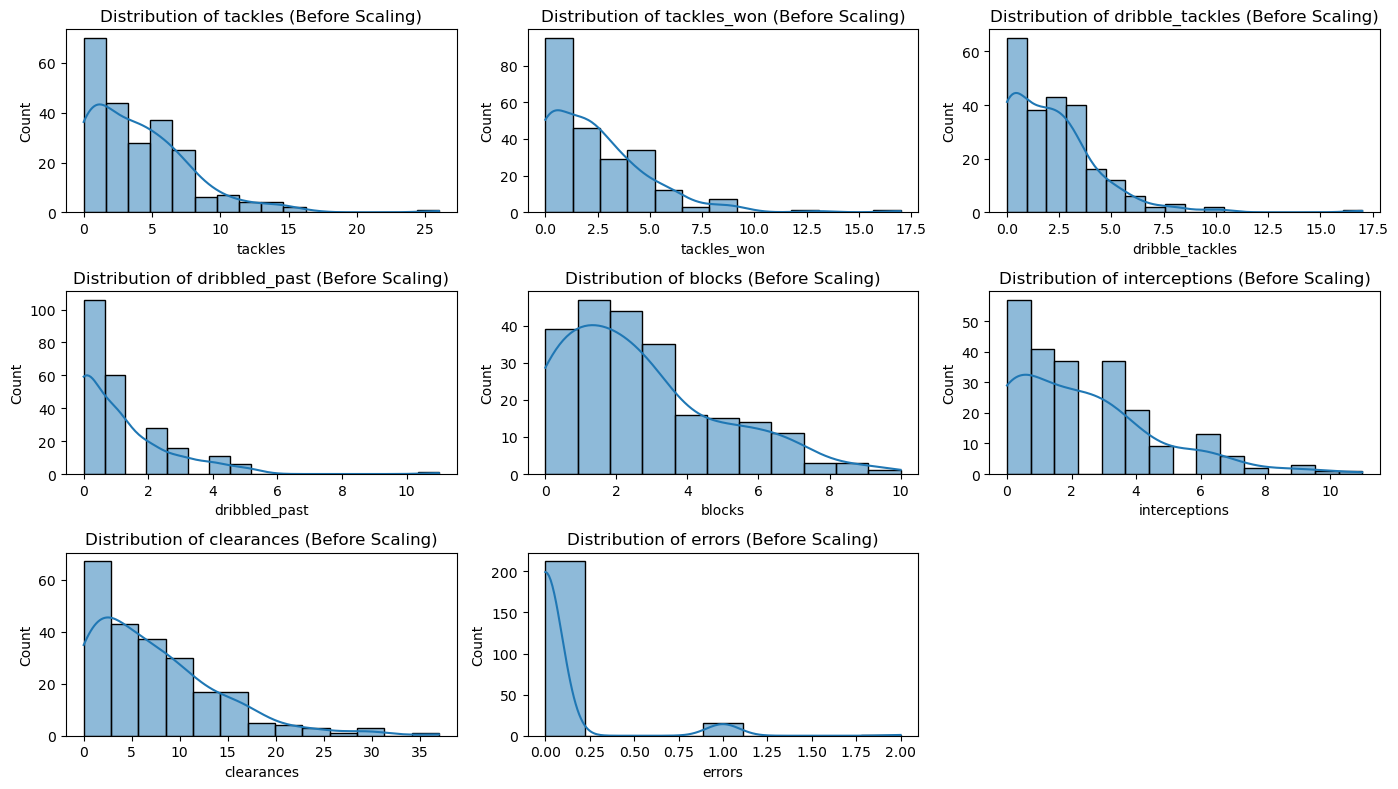

In [56]:
plt.figure(figsize=(14, 8))
metrics = ['tackles', 'tackles_won', 'dribble_tackles', 'dribbled_past', 
                   'blocks', 'interceptions', 'clearances', 'errors']
for i, metric in enumerate(metrics):
    plt.subplot(3, 3, i+1)
    sns.histplot(filtered_defense[metric], kde=True)
    plt.title(f'Distribution of {metric} (Before Scaling)')
plt.tight_layout()
plt.show()

In [57]:
# Scale the data 
scale = StandardScaler()

# Scale attacker data
# also checks whether data is properly scaled and transformed back into the original data frame by checking missing values 
scaled_attackers = scale.fit_transform(filtered_attackers[['goals', 'shots', 'shots_on_target', 
                         'goals_per_shot_on_target', 'goals_per_shot', 'xg', 'npxg']])

scaled_attackers_df = pd.DataFrame(scaled_attackers, columns=['goals', 'shots', 'shots_on_target', 'goals_per_shot_on_target', 'goals_per_shot', 'xg', 'npxg'])

print("Scaled Attackers - Missing values after scaling:\n", scaled_attackers_df.isnull().sum())

filtered_attackers_scaled = filtered_attackers[['player', 'position', 'team']].reset_index(drop=True).join(scaled_attackers_df)
print(filtered_attackers_scaled)

Scaled Attackers - Missing values after scaling:
 goals                       0
shots                       0
shots_on_target             0
goals_per_shot_on_target    0
goals_per_shot              0
xg                          0
npxg                        0
dtype: int64
                    player position     team     goals     shots  \
0     Abderrazak Hamdallah       FW  Morocco -0.544053 -0.437509   
1    Abdessamad Ezzalzouli       FW  Morocco -0.544053 -0.664866   
2    Abdul Fatawu Issahaku       FW    Ghana -0.544053 -0.892223   
3          Ahmed Alaaeldin       FW    Qatar -0.544053 -0.892223   
4               Akram Afif       FW    Qatar -0.544053 -0.437509   
..                     ...      ...      ...       ...       ...   
180      Youssef En-Nesyri       FW  Morocco  1.206379  1.153991   
181      Youssoufa Moukoko       FW  Germany -0.544053 -0.892223   
182              Yuki Soma       FW    Japan -0.544053 -0.210152   
183      Zakaria Aboukhlal       FW  Morocco  0

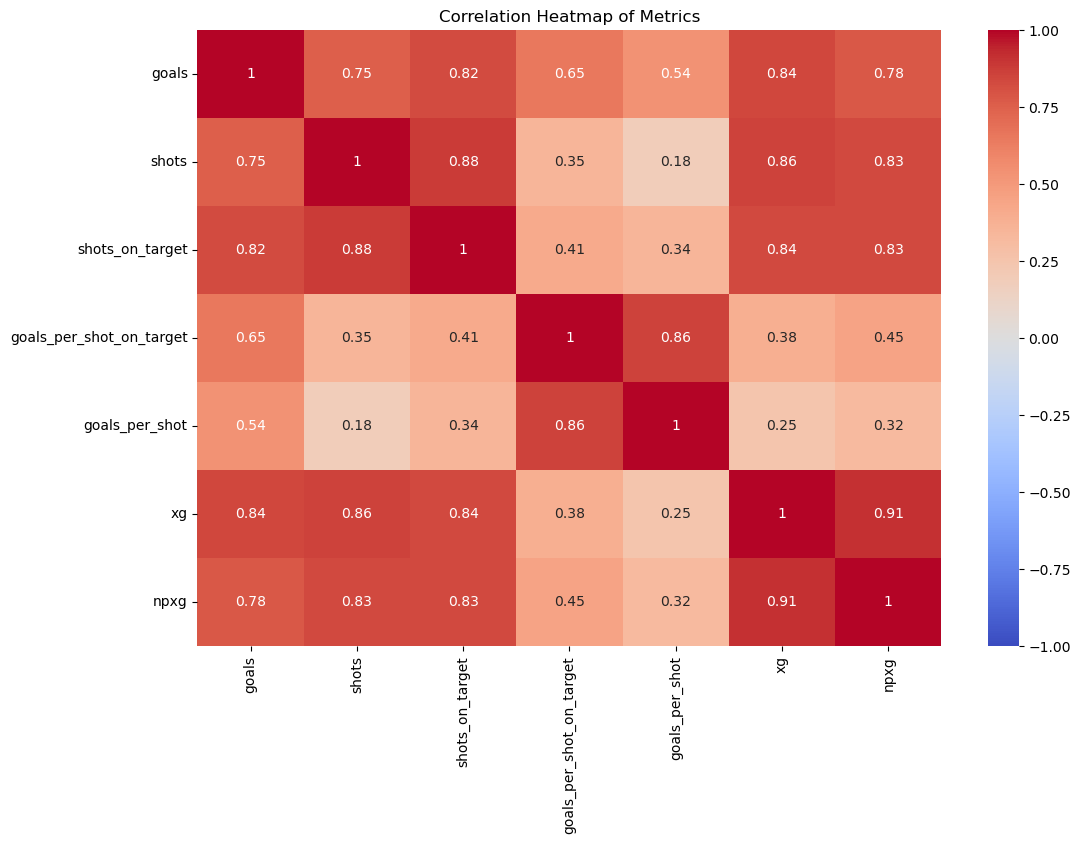

In [58]:
# Heatmap to show correlations between metrics (attackers) 

metrics1 = ['goals', 'shots', 'shots_on_target', 'goals_per_shot_on_target', 'goals_per_shot', 'xg', 'npxg']


plt.figure(figsize=(12, 8))
sns.heatmap(filtered_attackers_scaled[metrics1].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Metrics')
plt.show()

# Note : attacker metrics that is included here are that of volume-based metrics (i.e goals and shots) and efficiency metrics (i.e shots_on_target and goals_per_shot_on_target) 
# This heatmap correlation of attacker metrics presents us with an interesting insights; The weaker correlation between volume and efficiency metrics in the heatmap suggests that higher volume does not necessarily equate to higher efficiency.
# For instance, players can take many shots without scoring efficiently, or they can be highly efficient with fewer shots
# After looking at this heatmap, it validates my judgement to include both volume-based metrics and efficiency metrics to evaluate player performance comprehensively 

In [59]:
# Scale defense data
scaled_defense = scale.fit_transform(filtered_defense[['tackles', 'tackles_won', 'dribble_tackles', 'dribbled_past', 
                   'blocks', 'interceptions', 'clearances', 'errors']])

scaled_defense_df = pd.DataFrame(scaled_defense, columns=['tackles', 'tackles_won', 'dribble_tackles', 'dribbled_past', 
                   'blocks', 'interceptions', 'clearances', 'errors'])

print("Scaled defense - Missing values after scaling:\n", scaled_defense_df.isnull().sum())

filtered_defense_scaled = filtered_defense[['player', 'position', 'team']].reset_index(drop=True).join(scaled_defense_df)
print(filtered_defense_scaled)

Scaled defense - Missing values after scaling:
 tackles            0
tackles_won        0
dribble_tackles    0
dribbled_past      0
blocks             0
interceptions      0
clearances         0
errors             0
dtype: int64
                player position          team   tackles  tackles_won  \
0    Abdelkarim Hassan       DF         Qatar  0.779368     0.250481   
1         Abdou Diallo       DF       Senegal -0.540810    -0.154552   
2    Abdulelah Al-Amri       DF  Saudi Arabia -0.804845    -0.964619   
3        Abdullah Madu       DF  Saudi Arabia -0.804845    -0.964619   
4      Abolfazl Jalali       DF       IR Iran -1.068881    -0.964619   
..                 ...      ...           ...       ...          ...   
223    Youssouf Sabaly       DF       Senegal  0.515333     1.465581   
224      Youstin Salas       DF    Costa Rica  0.251297    -0.559586   
225    Ángelo Preciado       DF       Ecuador  0.779368     1.060548   
226       Éder Militão       DF        Brazil  0.77

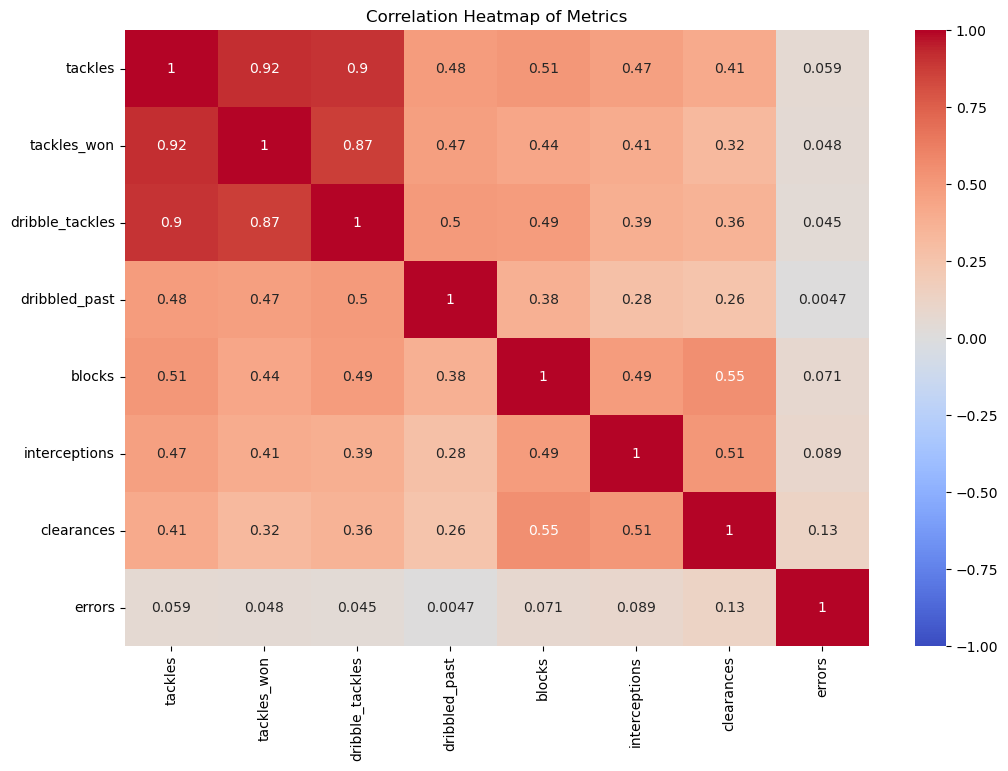

In [60]:
# Heatmap to show correlations between metrics (defense)

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_defense_scaled[metrics].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Metrics')
plt.show()

# Note: As part of my EDA, it is beneficial to see the correlation between variables. For the most part, this heatmap visualization is to validate the relationship 
# between variables (I.e it is expected that tackles and tackles_won has a strong correlation close to 1, as more tackles generally lead to more tackles won
# Errors have generally weak correlation with other metrics This might indicate that errors are not strongly related to the other defensive metrics, or that they are a more independent measure of defensive performance.

In [61]:
# Scale midfielder data
scaled_midfielder = scale.fit_transform(filtered_midfielder[['passes_completed', 'assists', 'pass_xa'
                           , 'assisted_shots', 'progressive_passes', 'touches', 'touches_mid_3rd', 'miscontrols', 'dispossessed', 'dribbles_completed', 'passes_received',
                           'progressive_passes_received', 'xg_assist']])

scaled_midfielder_df = pd.DataFrame(scaled_midfielder, columns=['passes_completed', 'assists', 'pass_xa'
                           , 'assisted_shots', 'progressive_passes', 'touches', 'touches_mid_3rd', 'miscontrols', 'dispossessed', 'dribbles_completed', 'passes_received',
                           'progressive_passes_received', 'xg_assist'])

print("Scaled Midfielder - Missing values after scaling:\n", scaled_midfielder_df.isnull().sum())

filtered_midfielder_scaled = filtered_midfielder[['player', 'position', 'team']].reset_index(drop=True).join(scaled_midfielder_df)
print(filtered_midfielder_scaled)

Scaled Midfielder - Missing values after scaling:
 passes_completed               0
assists                        0
pass_xa                        0
assisted_shots                 0
progressive_passes             0
touches                        0
touches_mid_3rd                0
miscontrols                    0
dispossessed                   0
dribbles_completed             0
passes_received                0
progressive_passes_received    0
xg_assist                      0
dtype: int64
                  player position          team  passes_completed   assists  \
0             Aaron Mooy       MF     Australia          0.960738 -0.355250   
1           Aaron Ramsey       MF         Wales          0.070340 -0.355250   
2      Abdelhamid Sabiri       MF       Morocco         -0.396576  2.077672   
3        Abdulaziz Hatem       MF         Qatar         -0.103396 -0.355250   
4    Abdulellah Al-Malki       MF  Saudi Arabia         -0.168547 -0.355250   
..                   ...      ...

In [62]:
# Assigning Normalized Weight to Compute Composite Score to Rank Players 

In [63]:
# Attacker KPIs
# Define weights for each metric
weights_attackers = {
    'goals': 0.3,
    'shots': 0.1,
    'shots_on_target': 0.15,
    'goals_per_shot_on_target': 0.15,
    'goals_per_shot': 0.1,
    'xg': 0.15,
    'npxg': 0.05
}

# Ensure weights sum to 1
assert sum(weights_attackers.values()) == 1, "Weights must sum to 1"

# Compute the composite score
filtered_attackers_scaled['composite_score'] = (
    filtered_attackers_scaled['goals'] * weights_attackers['goals'] +
    filtered_attackers_scaled['shots'] * weights_attackers['shots'] +
    filtered_attackers_scaled['shots_on_target'] * weights_attackers['shots_on_target'] +
    filtered_attackers_scaled['goals_per_shot_on_target'] * weights_attackers['goals_per_shot_on_target'] +
    filtered_attackers_scaled['goals_per_shot'] * weights_attackers['goals_per_shot'] +
    filtered_attackers_scaled['xg'] * weights_attackers['xg'] +
    filtered_attackers_scaled['npxg'] * weights_attackers['npxg']
)

In [64]:
# Sort players by composite score in descending order
top_attackers = filtered_attackers_scaled.sort_values(by='composite_score', ascending=False).head(10)

# Display the top 10 players
print("Top 10 Attackers by Composite Score:")
print(top_attackers[['player', 'team', 'position', 'composite_score']])

Top 10 Attackers by Composite Score:
              player         team position  composite_score
102    Kylian Mbappé       France       FW         4.530211
106     Lionel Messi    Argentina       FW         4.336484
136   Olivier Giroud       France       FW         2.546666
85    Julián Álvarez    Argentina       FW         2.357672
149      Richarlison       Brazil       FW         1.723583
113  Marcus Rashford      England       FW         1.638504
58     Gonçalo Ramos     Portugal       FW         1.603675
184    Álvaro Morata        Spain       FW         1.548803
48    Enner Valencia      Ecuador       FW         1.527595
36        Cody Gakpo  Netherlands       FW         1.354695


/var/folders/fj/5b10dxln679gv8nrzs7y5ps80000gn/T/ipykernel_7837/1342999019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='composite_score', y='player', data=top_attackers, palette='viridis', legend=False)


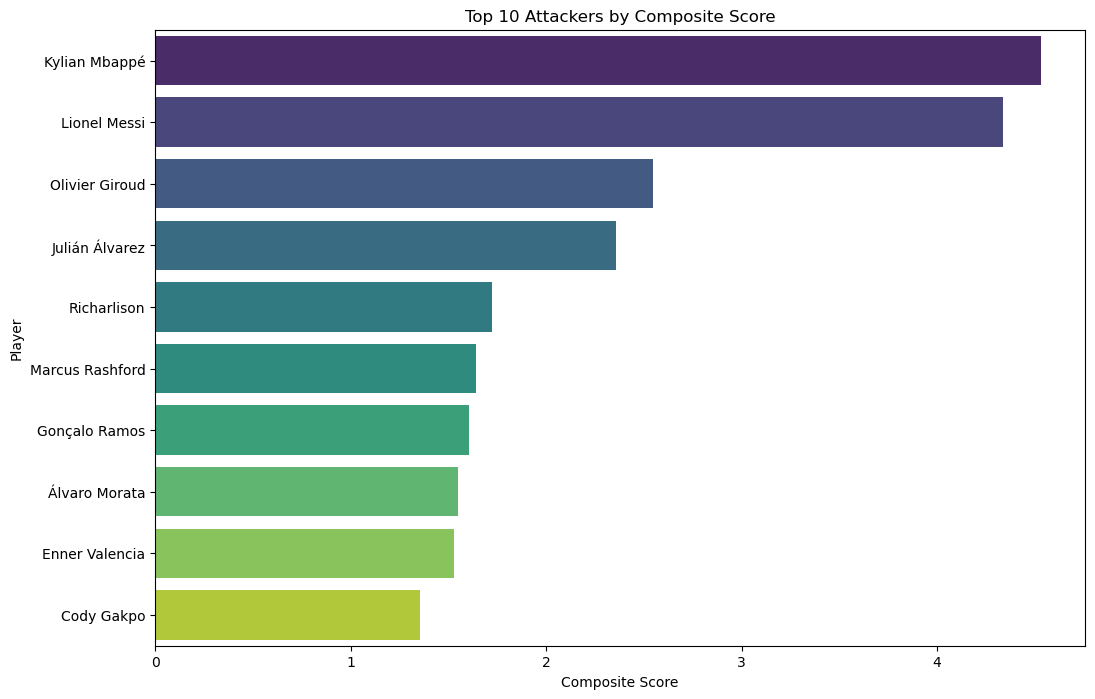

In [65]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='composite_score', y='player', data=top_attackers, palette='viridis', legend=False)
plt.title('Top 10 Attackers by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Player')
plt.show()

In [66]:
# Defense KPIs 
# Define weights for each metric
weight_defense = {
    'tackles': 0.2, 
    'tackles_won': 0.25, 
    'dribble_tackles': 0.15, 
    'dribbled_past': -0.05, 
    'blocks': 0.1, 
    'interceptions': 0.2, 
    'clearances': 0.2, 
    'errors': -0.05
}

# Ensure weights sum to 1
assert sum(weight_defense.values()) == 1, "Weights must sum to 1"

# Compute the composite score
filtered_defense_scaled['composite_score'] = (
    filtered_defense_scaled['tackles'] * weight_defense['tackles'] +
    filtered_defense_scaled['tackles_won'] * weight_defense['tackles_won'] +
    filtered_defense_scaled['dribble_tackles'] * weight_defense['dribble_tackles'] +
    filtered_defense_scaled['dribbled_past'] * weight_defense['dribbled_past'] +
    filtered_defense_scaled['blocks'] * weight_defense['blocks'] +
    filtered_defense_scaled['interceptions'] * weight_defense['interceptions'] +
    filtered_defense_scaled['clearances'] * weight_defense['clearances'] +
    filtered_defense_scaled['errors'] * weight_defense['errors'] 
)

In [67]:
# Sort players by composite score in descending order
top_defense = filtered_defense_scaled.sort_values(by='composite_score', ascending=False).head(10)

# Display the top 10 players
print("Top 10 Defense by Composite Score:")
print(top_defense[['player', 'team', 'position', 'composite_score']])

Top 10 Defense by Composite Score:
                player         team position  composite_score
6        Achraf Hakimi      Morocco       DF         4.248334
106     Joško Gvardiol      Croatia       DF         2.667044
207     Theo Hernández       France       DF         2.214047
164   Nicolás Otamendi    Argentina       DF         2.098034
111  Kalidou Koulibaly      Senegal       DF         2.046560
86     Ibrahima Konaté       France       DF         1.968680
110     Jurriën Timber  Netherlands       DF         1.876614
169  Noussair Mazraoui      Morocco       DF         1.833867
101    Josip Juranović      Croatia       DF         1.832031
34          Borna Sosa      Croatia       DF         1.759871


/var/folders/fj/5b10dxln679gv8nrzs7y5ps80000gn/T/ipykernel_7837/1975421687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='composite_score', y='player', data=top_defense, palette='viridis', legend=False)


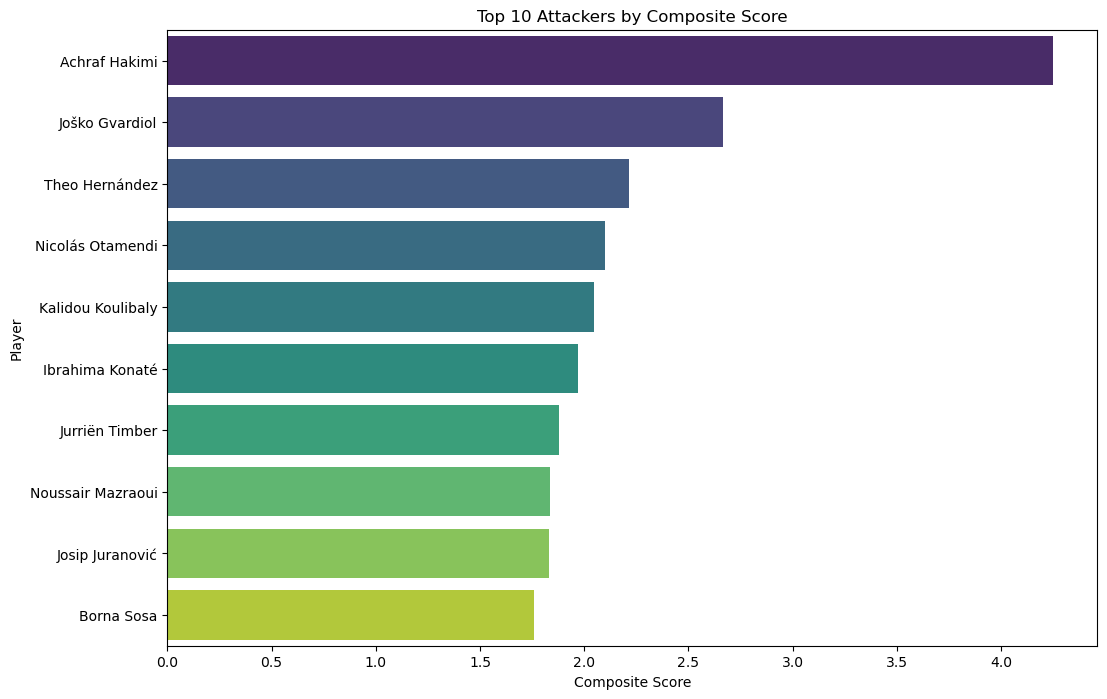

In [68]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='composite_score', y='player', data=top_defense, palette='viridis', legend=False)
plt.title('Top 10 Attackers by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Player')
plt.show()

In [73]:
# Midfielder KPIs 
# Define weights for each metric
weight_midfielder = {
    'passes_completed': 0.1, 
    'assists': 0.15, 
    'pass_xa': 0.15, 
    'assisted_shots': 0.1, 
    'progressive_passes': 0.1, 
    'touches': 0.05, 
    'touches_mid_3rd': 0.1, 
    'miscontrols': -0.02, 
    'dispossessed': -0.03, 
    'dribbles_completed': 0.05, 
    'passes_received': 0.05,                     
    'progressive_passes_received': 0.1, 
    'xg_assist': 0.1
}

# Ensure weights sum to 1
assert sum(weight_midfielder.values()) == 1, "Weights must sum to 1"


# Compute the composite score
filtered_midfielder_scaled['composite_score'] = (
    filtered_midfielder_scaled['passes_completed'] * weight_midfielder['passes_completed'] +
    filtered_midfielder_scaled['assists'] * weight_midfielder['assists'] +
    filtered_midfielder_scaled['pass_xa'] * weight_midfielder['pass_xa'] +
    filtered_midfielder_scaled['assisted_shots'] * weight_midfielder['assisted_shots'] +
    filtered_midfielder_scaled['progressive_passes'] * weight_midfielder['progressive_passes'] +
    filtered_midfielder_scaled['touches'] * weight_midfielder['touches'] +
    filtered_midfielder_scaled['touches_mid_3rd'] * weight_midfielder['touches_mid_3rd'] +
    filtered_midfielder_scaled['miscontrols'] * weight_midfielder['miscontrols'] + 
    filtered_midfielder_scaled['dispossessed'] * weight_midfielder['dispossessed'] + 
    filtered_midfielder_scaled['passes_received'] * weight_midfielder['passes_received'] + 
    filtered_midfielder_scaled['progressive_passes_received'] * weight_midfielder['progressive_passes_received'] + 
    filtered_midfielder_scaled['xg_assist'] * weight_midfielder['xg_assist']
)


In [196]:
# Sort players by composite score in descending order
top_midfielders = filtered_midfielder_scaled.sort_values(by='composite_score', ascending=False).head(10)

# Display the top 10 players
print("Top 10 Midfielders by Composite Score:")
print(top_midfielders[['player', 'team', 'position', 'composite_score']])

Top 10 Midfielders by Composite Score:
                  player       team position  composite_score
23     Antoine Griezmann     France       MF         5.150506
135          Luka Modrić    Croatia       MF         2.622308
143        Mateo Kovačić    Croatia       MF         2.448734
62        Enzo Fernández  Argentina       MF         2.201542
27   Aurélien Tchouaméni     France       MF         2.000944
174                Pedri      Spain       MF         1.975055
11   Alexis Mac Allister  Argentina       MF         1.899713
113       Joshua Kimmich    Germany       MF         1.854326
57           Dušan Tadić     Serbia       MF         1.837158
183      Rodrigo De Paul  Argentina       MF         1.796706


/var/folders/fj/5b10dxln679gv8nrzs7y5ps80000gn/T/ipykernel_7837/871711985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='composite_score', y='player', data=top_midfielders, palette='viridis', legend=False)


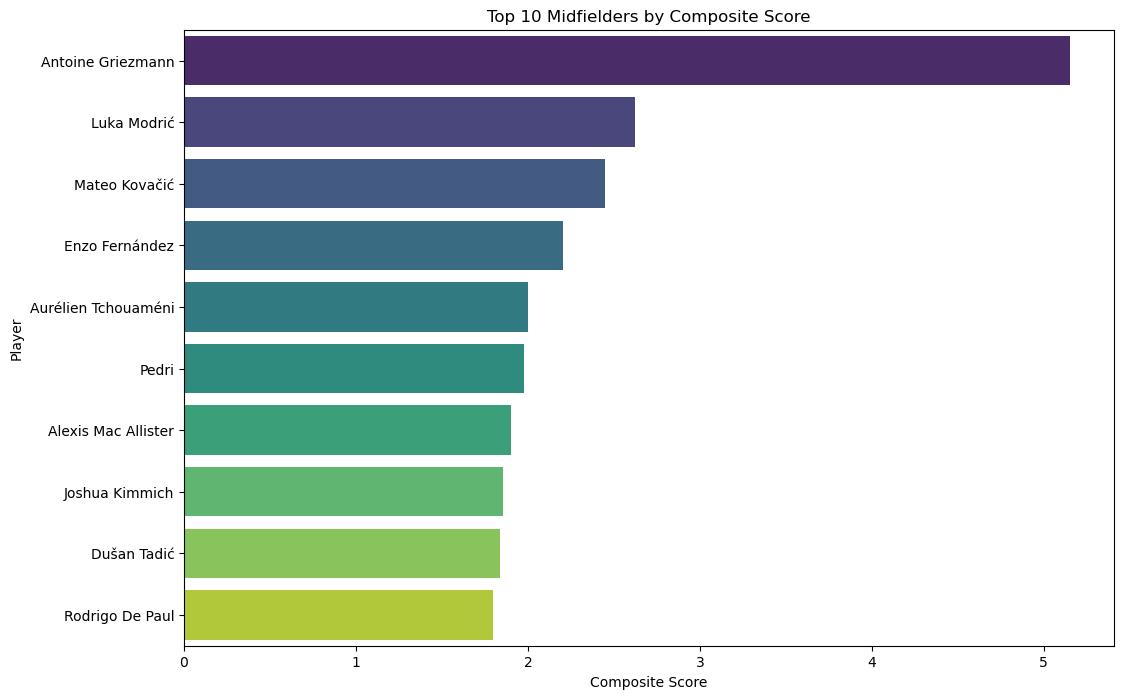

In [77]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='composite_score', y='player', data=top_midfielders, palette='viridis', legend=False)
plt.title('Top 10 Midfielders by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Player')
plt.show()

In [ ]:
# Answering interesting questions!

In [ ]:
# Question 1: Does age affect players performance? 

In [81]:
# merge age for attackers to composite score 
merged_attack = filtered_attackers[['player', 'age']].merge(
    filtered_attackers_scaled[['player', 'composite_score']],
    on='player'
)


# Merge age for defense to composite score 
merged_defense = filtered_defense[['player', 'age']].merge(
    filtered_defense_scaled[['player', 'composite_score']],
    on='player'
)

# merge age for midfielder to composite score 
merged_midfield = filtered_midfielder[['player', 'age']].merge(
    filtered_midfielder_scaled[['player', 'composite_score']],
    on='player'
)

In [93]:
# Convert age to numeric (approximate by converting to years)
def convert_age(age_str):
    years, days = age_str.split('-')
    return int(years) + int(days) / 365.0

merged_attack['age_numeric'] = merged_attack['age'].apply(convert_age)
merged_defense['age_numeric'] = merged_defense['age'].apply(convert_age)
merged_midfield['age_numeric'] = merged_midfield['age'].apply(convert_age)

In [99]:
# Correlation between age and performance metrics
age_performance_defense = merged_defense[['age_numeric', 'composite_score']].corr()
age_performance_attack = merged_attack[['age_numeric', 'composite_score']].corr()
age_performance_midfield = merged_midfield[['age_numeric', 'composite_score']].corr()

                 age_numeric  composite_score
age_numeric         1.000000        -0.053712
composite_score    -0.053712         1.000000


In [102]:
print(age_performance_attack)

                 age_numeric  composite_score
age_numeric         1.000000         0.117585
composite_score     0.117585         1.000000


In [101]:
print(age_performance_defense)

                 age_numeric  composite_score
age_numeric         1.000000        -0.053712
composite_score    -0.053712         1.000000


In [103]:
print(age_performance_midfield)

                 age_numeric  composite_score
age_numeric         1.000000         0.064344
composite_score     0.064344         1.000000


In [ ]:
# Note: There is very weak to no correlation between players age and their performance all across different positions (correlation close to 0)
# Based on the data above, age does not appear to be a significant factor affecting the composite scores of attacker, defense, or midfielders

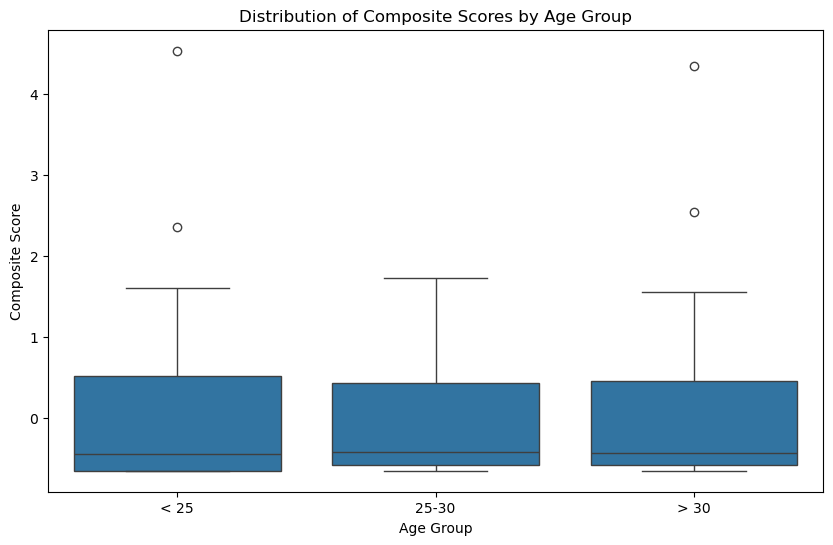

In [113]:
# Understand the distribution of composite score based on age 

# Create age groups
bins = [0, 25, 30, 100]  
labels = ['< 25', '25-30', '> 30']
merged_attack['age_group'] = pd.cut(merged_attack['age_numeric'], bins=bins, labels=labels, right=False)

# Boxplot to visualize the distribution of composite scores by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='composite_score', data=merged_attack)
plt.title('Distribution of Composite Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Composite Score')
plt.show()

In [114]:
outliers_under_25 = merged_attack[merged_attack['age_numeric'] < 25]
outliers_above_30 = merged_attack[merged_attack['age_numeric'] > 30]

print("Outliers for < 25 Age Group:")
print(outliers_under_25[outliers_under_25['composite_score'] > outliers_under_25['composite_score'].quantile(0.75) + 1.5 * (outliers_under_25['composite_score'].quantile(0.75) - outliers_under_25['composite_score'].quantile(0.25))])

print("\nOutliers for > 30 Age Group:")
print(outliers_above_30[outliers_above_30['composite_score'] > outliers_above_30['composite_score'].quantile(0.75) + 1.5 * (outliers_above_30['composite_score'].quantile(0.75) - outliers_above_30['composite_score'].quantile(0.25))])


Outliers for < 25 Age Group:
             player     age  composite_score  age_numeric age_group
85   Julián Álvarez  22-321         2.357672    22.879452      < 25
102   Kylian Mbappé  23-363         4.530211    23.994521      < 25

Outliers for > 30 Age Group:
             player     age  composite_score  age_numeric age_group
106    Lionel Messi  35-177         4.336484    35.484932      > 30
136  Olivier Giroud  36-079         2.546666    36.216438      > 30


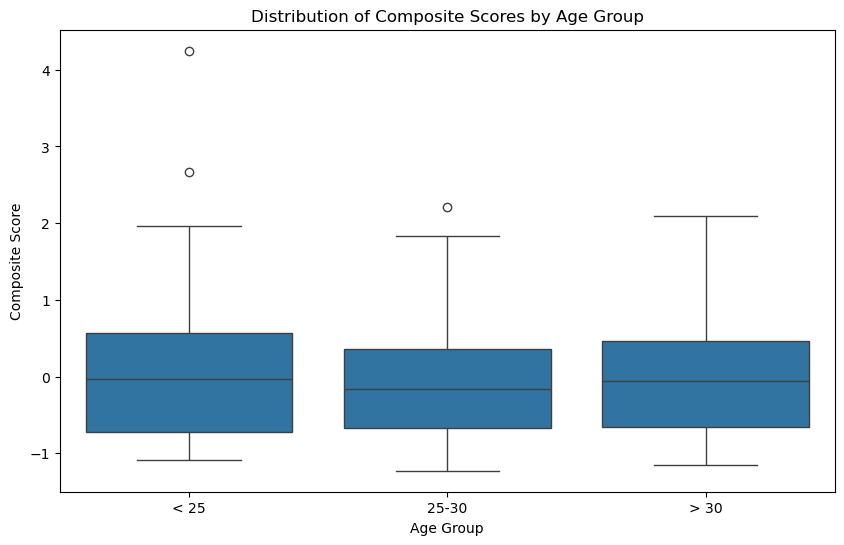

In [111]:
# Create age groups
bins = [0, 25, 30, 100]  
labels = ['< 25', '25-30', '> 30']
merged_defense['age_group'] = pd.cut(merged_defense['age_numeric'], bins=bins, labels=labels, right=False)

# Boxplot to visualize the distribution of composite scores by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='composite_score', data=merged_defense)
plt.title('Distribution of Composite Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Composite Score')
plt.show()

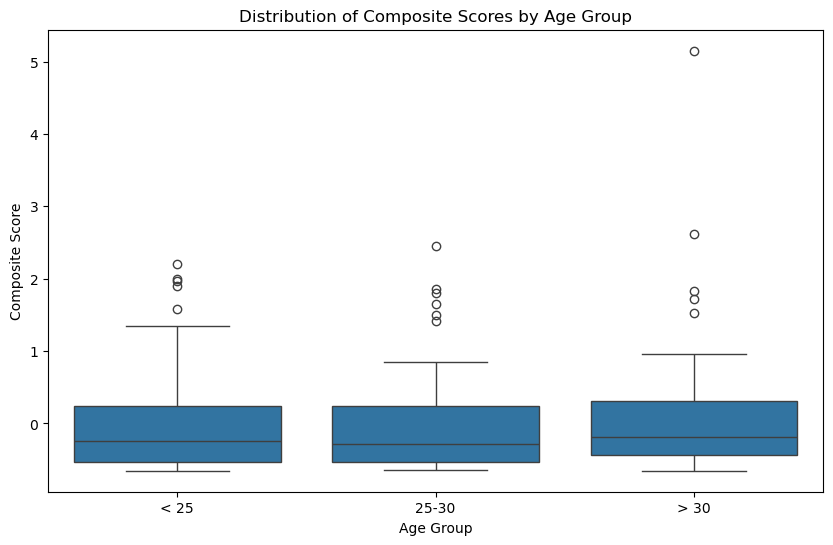

In [110]:
# Create age groups
bins = [0, 25, 30, 100]  
labels = ['< 25', '25-30', '> 30']
merged_midfield['age_group'] = pd.cut(merged_midfield['age_numeric'], bins=bins, labels=labels, right=False)

# Boxplot to visualize the distribution of composite scores by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='composite_score', data=merged_midfield)
plt.title('Distribution of Composite Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Composite Score')
plt.show()

# Note: Given the 

In [ ]:
# Note: Based on the boxplot, age does not seem to be a significant factor influencing composite scores, as validated by our correlation analysis earlier
# Performance, as measured by composite scores, is quite similar across different age groups. 
# However, there are exceptional performers in each age group, as shown by the outliers in the boxplot - for attackers, the most extreme being < 25 and > 30 
# For defense, < 25 and 25-30 and for midfield, the number of outliers are quite equal in all age group! 

In [ ]:
# Question 2: Does higher possession leads to more wins(goals)? 

In [195]:
# Aggregate goals by country team
team_goals = filtered_attackers.groupby('team')['goals'].sum().reset_index()

team_goals

,team,goals
0,Argentina,11.0
1,Australia,1.0
2,Belgium,1.0
3,Brazil,4.0
4,Cameroon,3.0
5,Canada,0.0
6,Costa Rica,0.0
7,Croatia,6.0
8,Denmark,0.0
9,Ecuador,3.0


In [200]:
# Aggregate composite scores by team
team_midfield_score = filtered_midfielder_scaled.groupby('team')['composite_score'].mean().reset_index()
team_midfield_score.columns = ['team', 'avg_composite_midfield_score']

,team,avg_composite_midfield_score
0,Argentina,0.547536
1,Australia,-0.076551
2,Belgium,-0.315382
3,Brazil,0.399920
4,Cameroon,-0.377446
5,Canada,-0.109146
6,Costa Rica,-0.471375
7,Croatia,1.702059
8,Denmark,-0.017785
9,Ecuador,-0.380350


In [210]:
# Merge team goals with average composite midfield score
team_performance = pd.merge(team_goals, team_midfield_score, on='team')

team_performance

,team,goals,avg_composite_midfield_score
0,Argentina,11.0,0.547536
1,Australia,1.0,-0.076551
2,Belgium,1.0,-0.315382
3,Brazil,4.0,0.399920
4,Cameroon,3.0,-0.377446
5,Canada,0.0,-0.109146
6,Costa Rica,0.0,-0.471375
7,Croatia,6.0,1.702059
8,Denmark,0.0,-0.017785
9,Ecuador,3.0,-0.380350


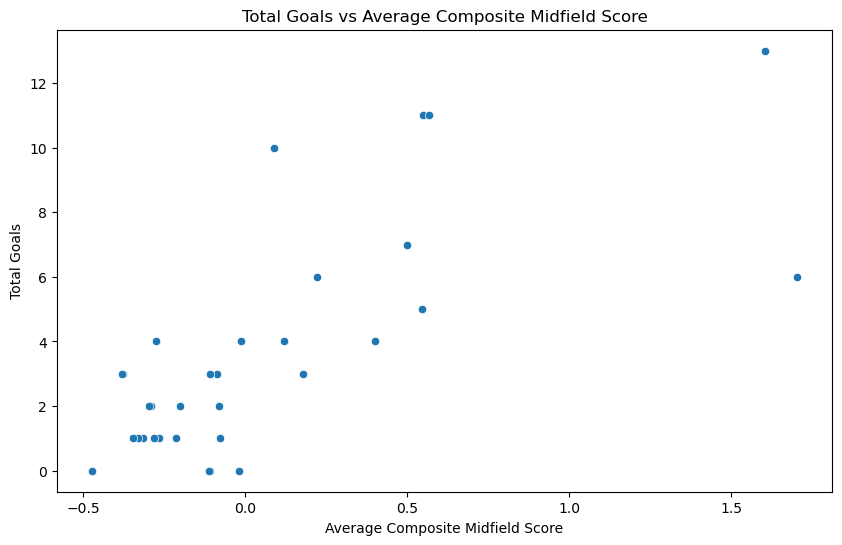

In [211]:
# Analyze correlation between total goals and average composite midfield score 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=team_performance, x='avg_composite_midfield_score', y='goals')
plt.title('Total Goals vs Average Composite Midfield Score')
plt.xlabel('Average Composite Midfield Score')
plt.ylabel('Total Goals')
plt.show()

In [241]:
# Calculate correlation between avg composite midfield score and total goals

composite_goals = team_performance[['goals', 'avg_composite_midfield_score']].corr()

composite_goals

# Note: Your correlation matrix shows a strong positive correlation (0.726) between the average composite midfield score and the total goals scored by the team. 
# This indicates that higher composite scores for midfield players are associated with a higher number of goals scored by the team. 
# This correlation suggests that midfield performance is a key factor in a team's ability to score goals.

,goals,avg_composite_midfield_score
goals,1.000000,0.726044
avg_composite_midfield_score,0.726044,1.000000


In [ ]:
# Developing a model 
# Can we train a model to predict the total number of goals scored by a team? 
# Since we are predicting total number of goals involves predicting for continuous outcomes, we can use resgression models to predict this outcomes from average composite scores that we have calculated 

In [247]:
# Data preparation 
# Understanding that I had computed the composite scores for each player above, I will now merge the individual player composite scores with their respecive teams' total goals 
# This step will aggregates the composite scores by team 

# Why aggregating the composite scores by team then taking the mean makes sense to develop this simple prediction model? 
# Since each player has a composite score representing their individual performance, aggregating these scores by team allows us to summarize the overall performance of the team 
# Averaging the composites scores on all players by team provides a single metric that represents the average performance of players in the team 
# This simplifies the feature used in the model while retaining the overall performance characteristics of the team.

all_players = pd.concat([filtered_attackers_scaled[['player', 'team', 'composite_score']],
                         filtered_defense_scaled[['player', 'team', 'composite_score']], 
                         filtered_midfielder_scaled[['player', 'team', 'composite_score']]])

# Merge player data with team goals
player_team_goals = all_players.merge(team_goals, on='team')

# Aggregate composite scores by team using the mean
team_features = all_players.groupby('team').agg({'composite_score': 'mean'}).reset_index()

<Axes: ylabel='Count'>

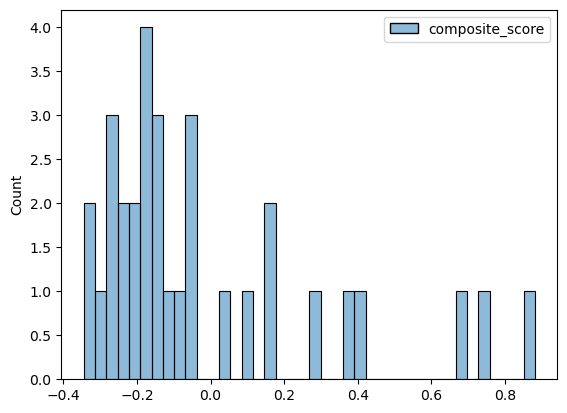

In [239]:
sns.histplot(team_features[['composite_score']], bins=40, alpha=.5)

In [249]:
# Merge with team goals
team_features = team_features.merge(team_goals, on='team')

team_features.head()

,team,composite_score,goals
0,Argentina,0.729843,11.0
1,Australia,-0.067947,1.0
2,Belgium,-0.219071,1.0
3,Brazil,0.176316,4.0
4,Cameroon,-0.188562,3.0


In [258]:
# import libraries to develop model
# Instead of only relying on linear regression model, we are going to try out a couple regression models and selecting the best performance based on its RMSE 

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [451]:
# Feature engineering 
X = team_features[['composite_score']] # X is the independent variables (input) that we need to predict our dependent variables (goals)
y = team_features['goals'] # Y is the dependent variables (output) we wanted to predict 

In [439]:
# Splitting the data into training and testing dataset 
X_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [440]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000, learning_rate_init=0.001, solver='adam')
}

In [441]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R^2': r2}

results_df = pd.DataFrame(results).T
results_df

/Users/michelletirtoatmojo/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,MSE,R^2
Random Forest,0.303843,0.887210
Gradient Boosting,0.274364,0.898153
Support Vector Regressor,0.434539,0.838694
Neural Network,0.323986,0.879732


In [ ]:
# Trying out different input using only attacker composite score instead of combined composite score 

In [427]:
# Filter only the attacker composite scores
attacker_features = filtered_attackers_scaled.groupby('team')['composite_score'].mean().reset_index()
attacker_features.columns = ['team', 'avg_composite_attacker_score']

In [429]:
# Merge attacker composite scores with team goals
team_attacker_goals = team_goals.merge(attacker_features, on='team')

,team,goals,avg_composite_attacker_score
0,Argentina,11.0,1.619145
1,Australia,1.0,-0.372067
2,Belgium,1.0,-0.361349
3,Brazil,4.0,0.182930
4,Cameroon,3.0,-0.123481
5,Canada,0.0,-0.450621
6,Costa Rica,0.0,-0.643811
7,Croatia,6.0,0.146331
8,Denmark,0.0,-0.392171
9,Ecuador,3.0,-0.039890


In [461]:
X = team_attacker_goals[['avg_composite_attacker_score']]  # X is the independent variable (input) that we need to predict our dependent variable (goals)
y = team_attacker_goals['goals'] 

In [462]:
# Scale the goals column
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Splitting the data into training and testing dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Flatten y_train and y_test to be 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

In [463]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000, learning_rate_init=0.001, solver='adam')
}

In [464]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
    mse = mean_squared_error(y_test_original, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_original, y_pred)
    results[model_name] = {'RMSE': rmse, 'R^2': r2}

results_df = pd.DataFrame(results).T
print(results_df)

                              RMSE       R^2
Random Forest             0.551219  0.887210
Gradient Boosting         0.523798  0.898153
Support Vector Regressor  0.602068  0.865441
Neural Network            0.642656  0.846687


In [465]:
# Tune Hyperparameters for Gradient Boosting

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform Grid Search for Gradient Boosting
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=10, scoring='neg_mean_squared_error')
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

best_gb

# Evaluate the tuned Gradient Boosting
y_pred_gb = best_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Best Gradient Boosting RMSE: {rmse_gb}")
print(f"Best Gradient Boosting R^2: {r2_gb}")

Best Gradient Boosting RMSE: 0.223536055183505
Best Gradient Boosting R^2: 0.7822138766919939


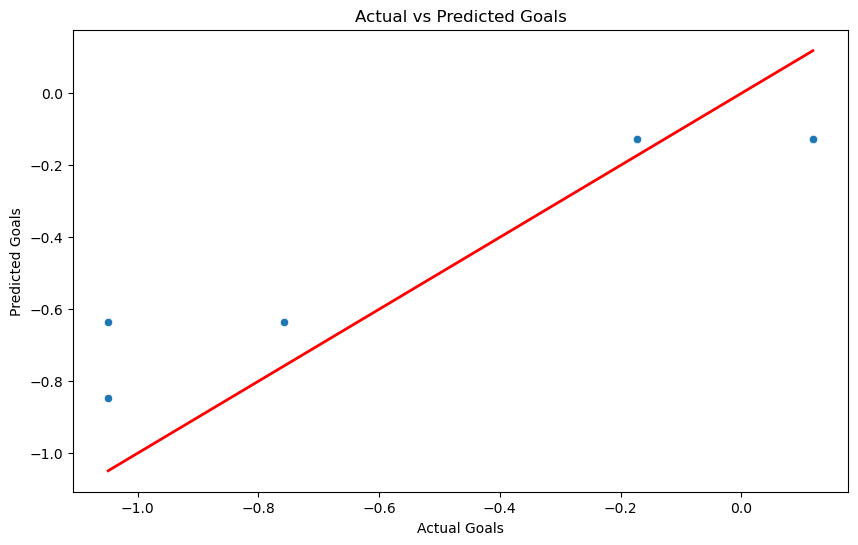

In [466]:
# Scatter plot of actual vs. predicted goals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.title('Actual vs Predicted Goals')
plt.show()